In [1]:
import pickle
import numpy as np

In [2]:
# DATA_FOLDER = "K://Tel/Disin/copy/data - Copy"
DATA_FOLDER = "K://Tel/Disin/praktikum/git/prominence-delineator-main/new_data - Copy"

In [3]:
def remove_t(ecg_all_leads, segmentation_data, file_number):
    ecg_all_leads_without_t = ecg_all_leads.copy()
    for i in range(len(segmentation_data['T_on'])):
        min_len=min(len(segmentation_data['T_on'][i]),len(segmentation_data['T_off'][i]))
        for j in range(min_len):
            for x in range(segmentation_data['T_on'][i][j], segmentation_data['T_off'][i][j]):
                ecg_all_leads_without_t[x][i]=0
                
    file_path = './without_waves_new/without_t/'+file_number+'.npy'

    # Save data to a file
    with open(file_path, 'wb') as file:
        np.save(file_path, ecg_all_leads_without_t)

In [4]:

def remove_r(ecg_all_leads, segmentation_data, file_number):
    ecg_all_leads_without_r = ecg_all_leads.copy()
    for i in range(len(segmentation_data['R_on'])):
        min_len=min(len(segmentation_data['R_on'][i]),len(segmentation_data['R_off'][i]))
        for j in range(min_len):
            for x in range(segmentation_data['R_on'][i][j], segmentation_data['R_off'][i][j]):
                ecg_all_leads_without_r[x][i]=0

    file_path = './without_waves_new/without_r/'+file_number+'.npy'

    # Save data to a file
    with open(file_path, 'wb') as file:
        np.save(file_path, ecg_all_leads_without_r)

In [5]:
import ecg_plot

def remove_p(ecg_all_leads, segmentation_data, file_number):
    ecg_all_leads_without_p = ecg_all_leads.copy()

    for i in range(len(segmentation_data['P_on'])):
        min_len=min(len(segmentation_data['P_on'][i]),len(segmentation_data['P_off'][i]))
        for j in range(min_len):
            for x in range(segmentation_data['P_on'][i][j], segmentation_data['P_off'][i][j]):
                ecg_all_leads_without_p[x][i]=0
                
    file_path = './without_waves_new/without_p/'+file_number+'.npy'
    
    # Save data to a file
    with open(file_path, 'wb') as file:
        np.save(file_path, ecg_all_leads_without_p)

In [6]:
def load_ecg_segmantation(file_number, ecg_all_leads):
#     print(file_number)
    file_path = './savedFilesNew/pkl/'+file_number+'.pkl'
    with open(file_path, 'rb') as file:
        segmentation_data = pickle.load(file)
    remove_p(ecg_all_leads, segmentation_data, file_number)
    remove_r(ecg_all_leads, segmentation_data, file_number)
    remove_t(ecg_all_leads, segmentation_data, file_number)
    print(segmentation_data)

In [7]:
def load_all_ecg(file_number):
    ecg_all_leads = np.load(DATA_FOLDER+'/'+file_number+'.npy')
    load_ecg_segmantation(file_number, ecg_all_leads)

In [8]:
import numpy as np
import os

directory = 'K://Tel/Disin/praktikum/git/prominence-delineator-main/savedFilesNew'

files = os.listdir(directory)

for file in files:
    file_path = os.path.join(directory, file)
    file_number = os.path.splitext(file)[0]
    file_number = ''.join(filter(str.isdigit, file_number))
    
    load_all_ecg(file_number)

{'P': [array([ 235,  548,  856, 1164, 1485, 1792, 2102, 2414, 2722, 3025, 3326,
       3629, 3928, 4237, 4538, 4841]), array([ 223,  547,  858, 1166, 1476, 1788, 2095, 2411, 2717, 3020, 3321,
       3624, 3927, 4236, 4536, 4832]), array([ 221,  546,  859, 1169, 1476, 1786, 2095, 2404, 2716, 3019, 3319,
       3621, 3927, 4234, 4530, 4829]), array([ 169,  484,  797, 1129, 1438, 1761, 2057, 2446, 2657, 3045, 3258,
       3571, 3965, 4171, 4507, 4779]), array([ 237,  522,  816, 1147, 1488, 1796, 2105, 2416, 2649, 3029, 3329,
       3632, 3907, 4238, 4541, 4842]), array([ 222,  547,  859, 1167, 1476, 1787, 2095, 2405, 2716, 3020, 3320,
       3622, 3927, 4235, 4534, 4830]), array([ 272,  526,  843, 1121, 1462, 1773, 2082, 2393, 2700, 2959, 3305,
       3609, 3909, 4216, 4485, 4819]), array([ 216,  502,  816, 1158, 1465, 1776, 2083, 2393, 2703, 3005, 3308,
       3613, 3951, 4220, 4485, 4822]), array([ 218,  533,  849, 1160, 1469, 1778, 2085, 2397, 2706, 3010, 3311,
       3615, 3915, 4221,

FileNotFoundError: [Errno 2] No such file or directory: 'K://Tel/Disin/praktikum/git/prominence-delineator-main/new_data - Copy/.npy'

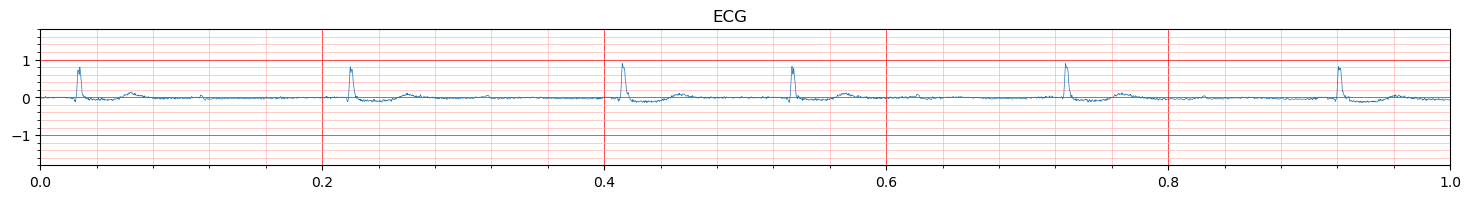

In [15]:
file_path = './without_waves_new/without_p/40.npy'
segmentation_data = np.load(file_path)

for i in range(1):    
    arr = segmentation_data[:, i] 
    ecg_data = arr
    ecg=ecg_data/1000
    ecg_plot.plot_1(ecg, sample_rate=5000, title = 'ECG')
    ecg_plot.show()     

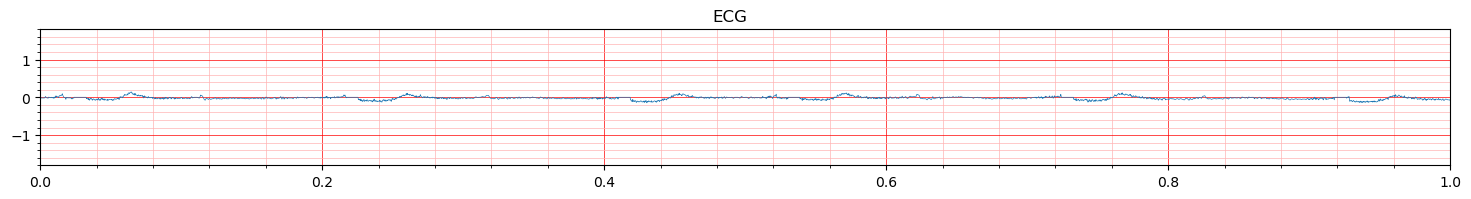

In [16]:
file_path = './without_waves_new/without_r/40.npy'
segmentation_data = np.load(file_path)

for i in range(1):    
    arr = segmentation_data[:, i] 
    ecg_data = arr
    ecg=ecg_data/1000
    ecg_plot.plot_1(ecg, sample_rate=5000, title = 'ECG')
    ecg_plot.show()  

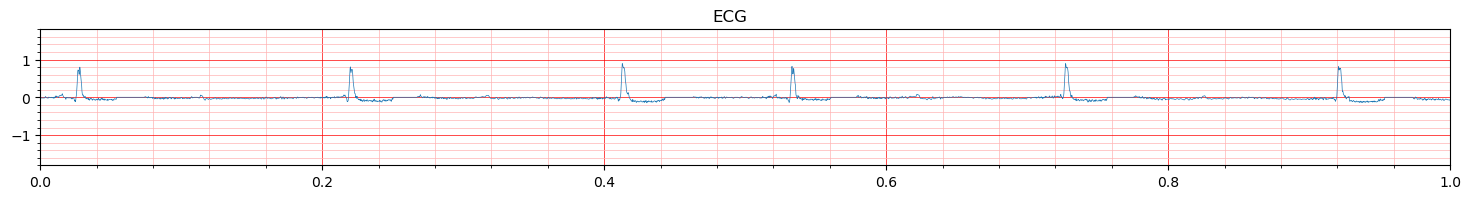

In [17]:
file_path = './without_waves_new/without_t/40.npy'
segmentation_data = np.load(file_path)

for i in range(1):    
    arr = segmentation_data[:, i] 
    ecg_data = arr
    ecg=ecg_data/1000
    ecg_plot.plot_1(ecg, sample_rate=5000, title = 'ECG')
    ecg_plot.show()  

In [ ]:
# pip install ecg_plot